In [1]:
from sklearn.neighbors import KernelDensity 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from utils.tools import gen_circular_distribution, gen_Xgrid
from utils.kde import KDEClassifier
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme()
np.random.seed(420)

In [2]:
X = np.random.normal(loc=0, scale=1, size = (40,1))

In [3]:
x_sample = np.linspace(-5,5,1000)

def plot_kde (bandwith, ax):
    kde = KernelDensity(kernel='gaussian',bandwidth=bandwith).fit(X)
    # note kde.score_samples returns the log likelihood so we raise by an exponent to adjust for this 
    # also, score, samples expects a 2D array hence the reshape
    p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
    sns.lineplot(x = x_sample, y = p, ax = ax, label=f"Bandwith = {bandwith}")
    ax.set_xlabel("x"); ax.set_ylabel("p(x)")
    ax.legend()
    return kde

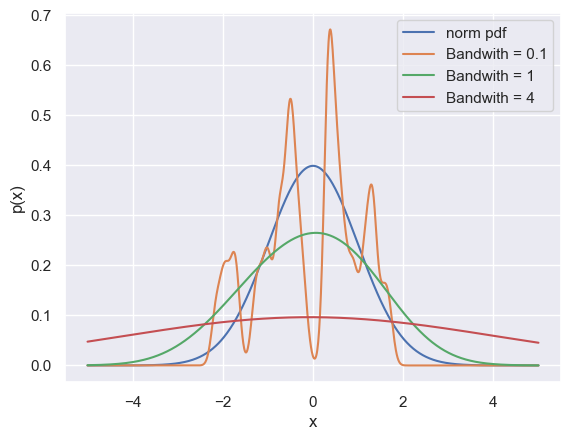

In [4]:
fig, ax = plt.subplots()
bandwiths = [0.1,1,4]

sns.lineplot(x = x_sample, y = norm.pdf(x_sample), label='norm pdf')
_= [plot_kde(bandwith=bandwith, ax = ax) for bandwith in bandwiths]

### Plotting one window

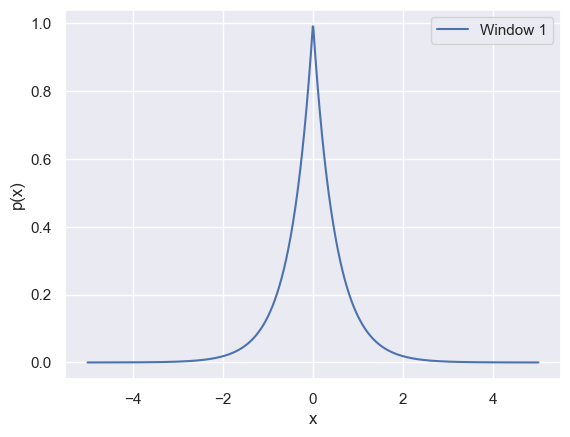

In [5]:
window_0 = KernelDensity(kernel='exponential',bandwidth=0.5).fit(np.zeros([1,1]))
p = np.exp(window_0.score_samples(x_sample.reshape(len(x_sample), -1)))

fig, ax = plt.subplots()
sns.lineplot(x = x_sample, y = p, ax = ax, label=f"Window 1")
ax.set_xlabel("x"); ax.set_ylabel("p(x)")
ax.legend()
#plt.show()

### Classifying a circular distribution

In [6]:
X,y = gen_circular_distribution(200)

# Instantiate the classifier
classifier = KDEClassifier(bandwidth= 0.75, kernel='gaussian')
classifier.fit(X=X, y=y)

# Define our sample space
x1, x2 = np.linspace(-10,10,200), np.linspace(-10,10,200)
x1grid, x2grid = np.meshgrid(x1,x2)
size = len(x1)**2
x1grid, x2grid = x1grid.reshape(size,-1), x2grid.reshape(size,-1)
Xgrid = np.concatenate((x1grid, x2grid), axis = 1)

# Classify samples
classifications = classifier.predict(X = Xgrid).reshape([200,200])

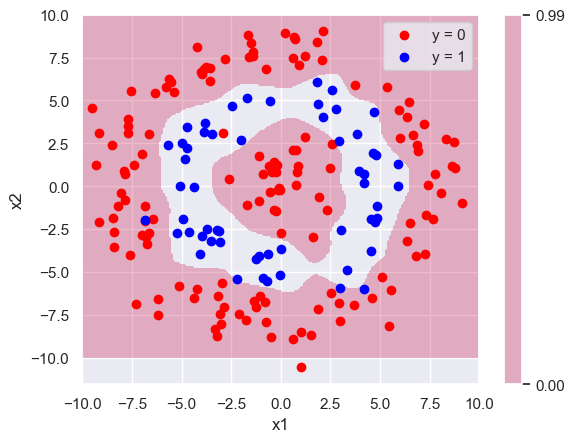

In [7]:
fig, ax = plt.subplots()
contour = ax.contourf(x1,x2, classifications, levels = [0, 0.99], alpha = 0.3)
ax.scatter(X[y==0,0], X[y==0,1], c = 'red', label = 'y = 0')
ax.scatter(X[y==1,0], X[y==1,1], c ='blue', label = 'y = 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.colorbar(contour)
ax.legend()

### Manual Nearest Neighbours

y nearest neighbour value:  2


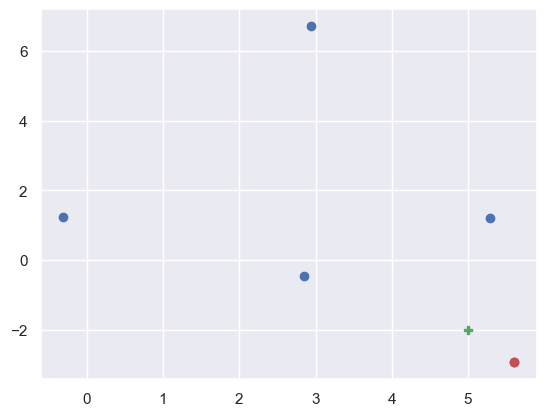

In [17]:
np.random.seed(0)
# generate 5 points, with independent normal distributions 
# in both x1 and x2 and label them 1-5 
n_points = 5 
X = np.random.normal(loc=0, scale=3, size = [n_points,2]) 
y = np.array(range(n_points))

# plot the points 
fig, ax = plt.subplots() 
# plot x1 vs x2
ax.scatter(X[:, 0], X[:, 1],c='b')

# define a test point at which we will calculate the nearest neighbour 
x_test = np.array([5,-2])

# make a function to get the nearest neighbour
def which_nearest(x_test, X: np.array):
	#get size:
	n_points, n_dims = X.shape
	#this will contain the shortest distance - set to infinity to start
	shortest_distance = float('inf')
	#this will identify the closest point
	which_point = -1
	for point_cnt in range(n_points):
		#your code here: calculate the distance between 
		#	  x_test and X[point_cnt,:]
		#you may wish to do this in another for loop
		#then store in a variable called current_distance
		current_distance = distance.cosine(x_test, X[point_cnt, :])
		#current_distance = ...
		
		#compare and update shortest_distance if necessary
		if current_distance < shortest_distance:
			which_point = point_cnt
			shortest_distance = current_distance
	return which_point

#use function to get the nearest value in X 
near = which_nearest(x_test,X)

#output y 
print("y nearest neighbour value: ", y[near])

#plot both the test point (green +) and the identified 
#  nearest neighbour (red circle) 
ax.scatter(X[y == near, 0], X[y == near, 1],c='r') 
ax.scatter(x_test[0], x_test[1],c='g',marker="P")

### Nearest Neighbours using Scikit-Learn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'x2')

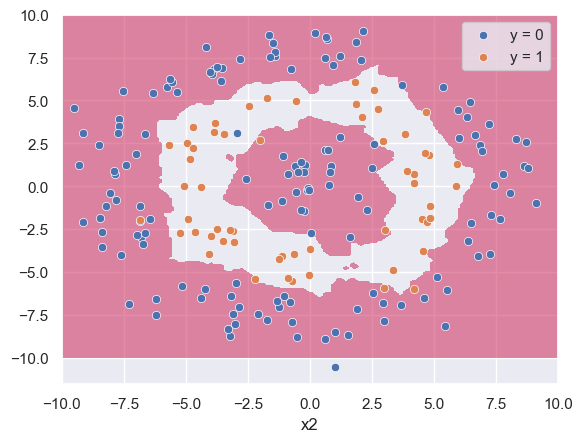

In [15]:
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit (X,y)

# Define our sample space
Xgrid, x1, x2 = gen_Xgrid(200, (-10,10))
classifications = classifier.predict(Xgrid)
fig, ax = plt.subplots()
ax.contourf(x1,x2, classifications.reshape(200,200), levels = [0,0.99], alpha = 0.5)
ax.legend()
sns.scatterplot(x = X[y==0,0], y = X[y==0,1], label = 'y = 0',ax = ax)
sns.scatterplot(x = X[y==1,0], y = X[y==1,1], label = 'y = 1', ax = ax)
ax.set_xlabel('x1')
ax.set_xlabel('x2')